In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

**ดึงข้อมูลจากไฟล์ data_preprocess\export-pm25_eng-1h.xlsx**
ใช้ .csv แล้วมีปัญหาตรง datetime จากการที่แยก column เพิ่มไม่ได้

In [310]:
df = pd.read_excel('data_preprocess\export-pm25_eng-1h.xlsx')
# df.to_csv("data_preprocess/export-pm25-1h.csv", index=False)

In [311]:
# df = pd.read_csv("data_preprocess/export-pm25-1h.csv")
df.head()

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature
0,0,2023-03-31 22:00:00,Asia/Bangkok,62.659563,4.727273,4.727273,4.727273,27.147784
1,1,2023-04-02 18:00:00,Asia/Bangkok,69.995698,7.857143,7.142857,7.142857,32.246966
2,2,2023-04-02 19:00:00,Asia/Bangkok,65.608215,8.400000,7.800000,7.800000,32.518829
3,3,2023-04-02 20:00:00,Asia/Bangkok,65.489705,8.750000,8.266667,8.266667,31.864227
4,4,2023-04-02 21:00:00,Asia/Bangkok,65.811462,10.316667,9.083333,9.083333,31.412888


**แยก timestamp เป็น feature hour, dayofweek, month, day**

In [312]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

**กำหนด timestamp เป็น datetime (ข้อมุลวันที่)**
จากขั้นตอนนี้ timestamp จะไทม่กลายเป็น feature

In [313]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  # แปลงให้เป็น datetime
df = df.set_index('timestamp')  # ตั้งค่า index เป็น timestamp
df = df.sort_index()  # เรียงลำดับตามเวลา
df

,Unnamed: 0,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature,hour,dayofweek,month,day
timestamp,,,,,,,,,,,
2023-03-31 22:00:00.000,0,Asia/Bangkok,62.659563,4.727273,4.727273,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00.000,1,Asia/Bangkok,69.995698,7.857143,7.142857,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00.000,2,Asia/Bangkok,65.608215,8.400000,7.800000,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00.000,3,Asia/Bangkok,65.489705,8.750000,8.266667,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00.000,4,Asia/Bangkok,65.811462,10.316667,9.083333,9.083333,31.412888,21,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 08:00:00.000,14791,Asia/Bangkok,90.929747,42.294118,37.568627,36.882353,23.684319,8,1,2,11
2025-02-11 09:00:00.000,14792,Asia/Bangkok,83.511569,42.916667,38.800000,41.166667,25.896389,9,1,2,11
2025-02-11 10:00:00.000,14793,Asia/Bangkok,72.046736,27.533333,23.333333,19.466667,28.852626,10,1,2,11


***Clean Data step 1***
1. Drop 'Unnamed: 0' column ; not have impact for model
2. Drop 'timezone' column ; Model use in thailand only\
3. Drop 'pm_10' column ;
4. Drop 'pm_2_5_sp' column ;

In [314]:
df_use = df.drop(columns=["Unnamed: 0", "timezone", "pm_2_5_sp", 'pm_10'], axis=1)
df_use.head()

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2023-03-31 22:00:00,62.659563,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00,69.995698,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00,65.608215,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00,65.489705,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00,65.811462,9.083333,31.412888,21,6,4,2


***Clean Data step 2***
1. Check null value and drop row ; cant use mean to instead, that have impact to model
2. Check outlier by boxplot

In [315]:
df_use.isnull().sum()
df_use = df_use.dropna()
df_use.isnull().sum()

humidity       0
pm_2_5         0
temperature    0
hour           0
dayofweek      0
month          0
day            0
dtype: int64

In [316]:
print(df_use['pm_2_5'].describe())
print(df_use['temperature'].describe())
print(df_use['humidity'].describe())

count    14792.000000
mean        21.195190
std         13.094135
min          1.421053
25%         11.233333
50%         18.848870
75%         29.450000
max        184.366667
Name: pm_2_5, dtype: float64
count    14792.000000
mean        29.699716
std          4.760888
min         20.419051
25%         26.383601
50%         28.508779
75%         31.404870
max         52.070282
Name: temperature, dtype: float64
count    14792.000000
mean        78.569546
std         13.272735
min         39.496231
25%         67.330850
50%         80.051360
75%         89.818908
max        100.000000
Name: humidity, dtype: float64


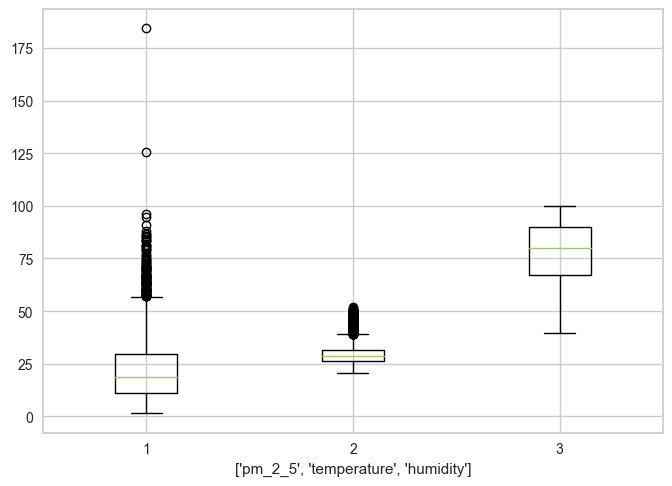

In [317]:
plt.boxplot(df_use[['pm_2_5', 'temperature', 'humidity']])
plt.xlabel(['pm_2_5', 'temperature', 'humidity'])
plt.show()

In [318]:
df_use.isnull().sum()
df_use = df_use.dropna()
df_use.isnull().sum()

humidity       0
pm_2_5         0
temperature    0
hour           0
dayofweek      0
month          0
day            0
dtype: int64

**ลบค่าที่มากกว่า Q3 ออกไป (Outlier)**

In [319]:
from scipy import stats
df_use = df_use[(np.abs(stats.zscore(df_use['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df_use = df_use[(np.abs(stats.zscore(df_use['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df_use = df_use[(np.abs(stats.zscore(df_use['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก

compare_data คือ data 7 อันสุดท้าย ของ df_use

และจากนั้นตัด df_use 7 data สุดท้ายออก เพื่อใช้ในการตรวจสอบว่าโมเดลดูแม่นจริงไหม

In [320]:
compare_data = df_use[-7:]  # Last 7 known values
compare_data
df_use = df_use[:-7]
compare_data


,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2025-02-10 21:00:00.000,77.279939,28.533333,26.323620,21,0,2,10
2025-02-10 22:00:00.000,78.573505,31.325581,26.209783,22,0,2,10
2025-02-11 08:00:00.000,90.929747,37.568627,23.684319,8,1,2,11
2025-02-11 09:00:00.000,83.511569,38.800000,25.896389,9,1,2,11
2025-02-11 10:00:00.000,72.046736,23.333333,28.852626,10,1,2,11
2025-02-11 11:00:00.000,64.332405,21.850000,30.593716,11,1,2,11
2025-02-11 11:15:35.967,61.046112,21.000000,31.861472,11,1,2,11


In [321]:
df_use.tail(7)

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2025-02-10 14:00:00,59.340358,25.183333,31.098929,14,0,2,10
2025-02-10 15:00:00,60.487345,25.450000,30.926083,15,0,2,10
2025-02-10 16:00:00,63.063890,25.416667,30.294568,16,0,2,10
2025-02-10 17:00:00,66.199043,26.355932,29.137454,17,0,2,10
2025-02-10 18:00:00,68.488902,27.033333,28.289712,18,0,2,10
2025-02-10 19:00:00,72.749861,28.883333,27.168525,19,0,2,10
2025-02-10 20:00:00,76.134625,28.383333,26.503902,20,0,2,10


***Chose feature use to be parametre***

ใช้เป็น humidity temperature and timestamp hour	dayofweek month	day

และตั้ง target คือ pm_2_5

In [322]:
ex = setup(data=df_use, target='pm_2_5', fold=10, train_size=0.8, session_id=123, iterative_imputation_iters=100, remove_outliers = True, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(14309, 7)"
4,Transformed data shape,"(13736, 7)"
5,Transformed train set shape,"(10874, 7)"
6,Transformed test set shape,"(2862, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [323]:
best_model = ex.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.4797,37.7061,6.1397,0.7558,0.3679,0.3719,0.5170
rf,Random Forest Regressor,5.3152,50.9192,7.1331,0.6703,0.4211,0.4488,0.6910
lightgbm,Light Gradient Boosting Machine,6.4761,67.6333,8.2216,0.5623,0.4795,0.5527,1.3890
knn,K Neighbors Regressor,6.9141,83.0108,9.1090,0.4625,0.5111,0.5783,0.2200
dt,Decision Tree Regressor,6.5449,97.9000,9.8869,0.3663,0.5405,0.4912,0.2430
gbr,Gradient Boosting Regressor,8.0535,101.1253,10.0542,0.3455,0.5684,0.7105,1.1760
ada,AdaBoost Regressor,9.4708,129.0904,11.3594,0.1647,0.6644,0.9548,0.3830
en,Elastic Net,9.3833,133.8694,11.5665,0.1343,0.6506,0.8853,0.2060
br,Bayesian Ridge,9.3701,133.8530,11.5659,0.1343,0.6490,0.8790,0.2060
lar,Least Angle Regression,9.3696,133.8608,11.5662,0.1343,0.6489,0.8786,0.2030


เลือก Extra Trees Regressor มาใช้

In [272]:
best_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.5291,59.2443,7.6970,0.5923,0.4265,0.4330
1,5.2793,54.0116,7.3493,0.6208,0.4311,0.4447
2,5.6522,63.0183,7.9384,0.6214,0.4355,0.4441
3,5.4844,59.2643,7.6983,0.6361,0.4394,0.4543
4,5.2052,54.0504,7.3519,0.6467,0.4283,0.4367
5,5.5037,59.5580,7.7174,0.6160,0.4365,0.4443
6,5.3762,57.1131,7.5573,0.6355,0.4501,0.4887
7,5.2288,51.1702,7.1533,0.6601,0.4347,0.4543
8,5.3718,58.2186,7.6301,0.6349,0.4259,0.4409


**ทำนาย ข้อมูลปัจจุบัน**

In [273]:
actual = predict_model(best_model, data=df_use)
actual

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.2970,13.7226,3.7044,0.9115,0.2164,0.1081


,humidity,temperature,month,day,pm_2_5,prediction_label
timestamp,,,,,,
2023-03-31 22:00:00,62.659565,27.147783,3,31,4.727273,22.270763
2023-04-02 18:00:00,69.995697,32.246967,4,2,7.142857,7.142857
2023-04-02 19:00:00,65.608215,32.518829,4,2,7.800000,7.800000
2023-04-02 20:00:00,65.489708,31.864227,4,2,8.266666,8.266666
2023-04-02 21:00:00,65.811462,31.412888,4,2,9.083333,9.083333
...,...,...,...,...,...,...
2025-02-10 16:00:00,63.063889,30.294567,2,10,25.416666,25.416666
2025-02-10 17:00:00,66.199043,29.137453,2,10,26.355932,26.289306
2025-02-10 18:00:00,68.488899,28.289711,2,10,27.033333,27.033333


**ทำนายข้อมูลที่ตัดออกไป 7 อันท้าย**

In [274]:
forecast = predict_model(best_model,data=compare_data)
forecast

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.8432,18.6217,4.3153,0.5955,0.1269,0.0833


,humidity,temperature,month,day,pm_2_5,prediction_label
timestamp,,,,,,
2025-02-10 21:00:00.000,77.279938,26.323620,2,10,28.533333,28.390303
2025-02-10 22:00:00.000,78.573502,26.209784,2,10,31.325581,27.934256
2025-02-11 08:00:00.000,90.929749,23.684319,2,11,37.568626,33.332289
2025-02-11 09:00:00.000,83.511566,25.896389,2,11,38.799999,28.860544
2025-02-11 10:00:00.000,72.046738,28.852625,2,11,23.333334,23.123459
2025-02-11 11:00:00.000,64.332405,30.593716,2,11,21.850000,20.656594
2025-02-11 11:15:35.967,61.046112,31.861471,2,11,21.000000,20.210861


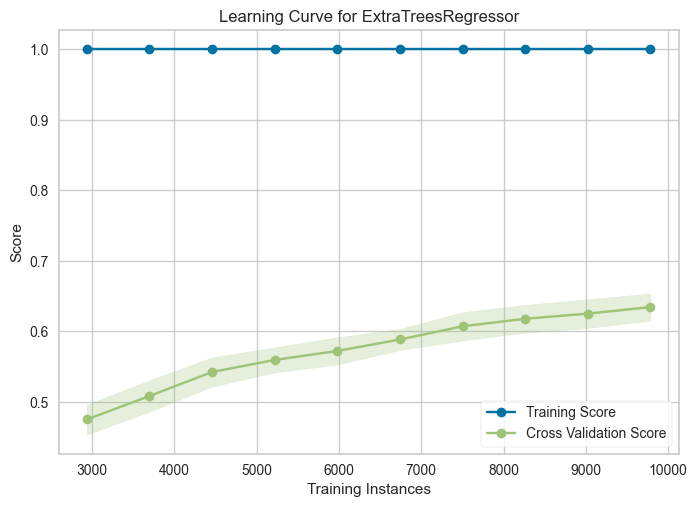

In [275]:
plot_model(best_model,plot='learning')

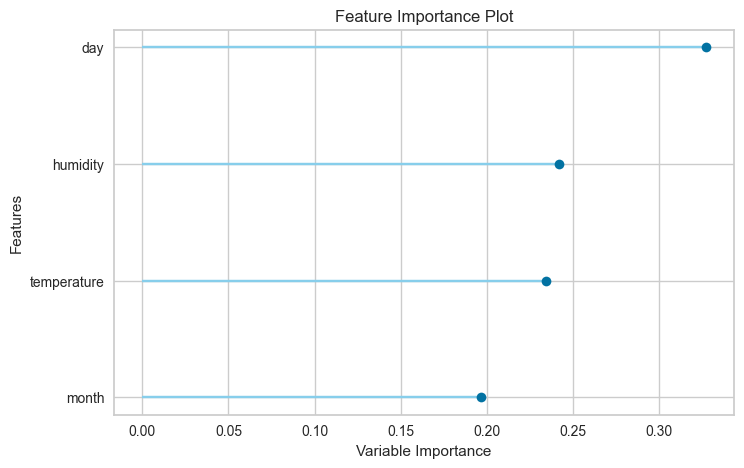

In [276]:
plot_model(best_model, plot='feature')

In [254]:
best_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.7215,94.3749,9.7147,0.3506,0.5497,0.6772
1,7.7093,90.4574,9.5109,0.3649,0.5649,0.7212
2,8.2569,106.5087,10.3203,0.3601,0.5700,0.7251
3,8.2574,103.6511,10.1809,0.3635,0.5862,0.7562
4,7.9255,97.9008,9.8945,0.3601,0.5779,0.7452
5,8.0274,99.7326,9.9866,0.3569,0.5748,0.7329
6,8.1039,98.6457,9.9321,0.3705,0.5998,0.8035
7,7.8854,95.2328,9.7587,0.3674,0.5737,0.7354
8,8.2712,103.7763,10.1871,0.3491,0.5891,0.7721


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


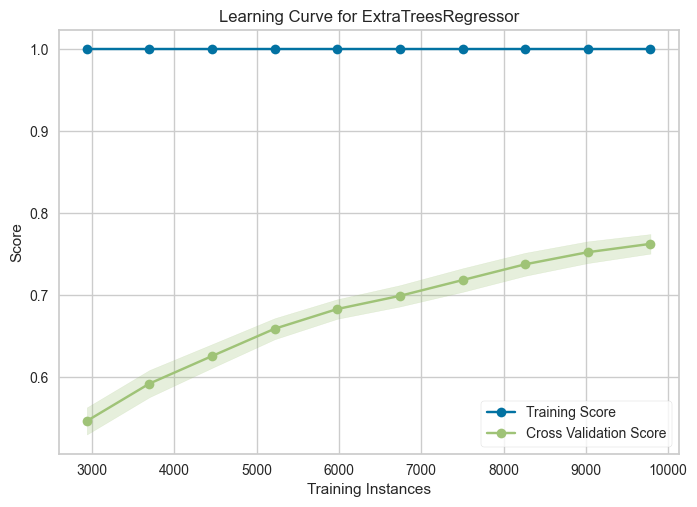

In [255]:
plot_model(best_model, plot='learning')

**ลองวัดความแม่นยำ**

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ดึงค่าจริงจาก test_df
actual_val = compare_data['pm_2_5']

# ดึงค่าทำนายจาก forecast
forecast_val = forecast['prediction_label']

# คำนวณ MAE
mae = mean_absolute_error(actual_val, forecast_val)

# คำนวณ MSE
mse = mean_squared_error(actual_val, forecast_val)

# คำนวณ RMSE
rmse = np.sqrt(mse)

# คำนวณ MAPE
def calculate_mape(actual_val, forecast_val):
    return np.mean(np.abs((actual_val - forecast_val) / actual_val)) * 100

mape = calculate_mape(actual_val, forecast_val)

# คำนวณ R²
r2 = r2_score(actual_val, forecast_val)

# คำนวณความแม่นยำ (Accuracy)
mean_actual = np.mean(actual_val)
accuracy = (1 - (mae / mean_actual)) * 100

# แสดงผลลัพธ์
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(r2)
print(f"R² (ความแม่นยำ): {r2 * 100:.2f}%")
print(f"ความแม่นยำ (Accuracy): {accuracy:.2f}%")

MAE: 2.8680
MSE: 13.0093
RMSE: 3.6068
MAPE: 9.30%
0.7174267001314079
R² (ความแม่นยำ): 71.74%
ความแม่นยำ (Accuracy): 90.08%


**ลองเอาไฟล์อื่นมาเทสกับตัวโมเดล (df_test)**

หลังจากลอง สรุป คือ ลองกับ data อื่น เดา 7 วันไม่แม่น แต่ถ้าทำทั้งหมดก็พอได้

In [197]:
df_test = pd.read_excel('data_preprocess\export-r202_test_nbiot-1h.xlsx')

df_test['hour'] = df_test['timestamp'].dt.hour
df_test['dayofweek'] = df_test['timestamp'].dt.dayofweek
df_test['month'] = df_test['timestamp'].dt.month
df_test['day'] = df_test['timestamp'].dt.day
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'], errors='coerce')  # แปลงให้เป็น datetime
df_test = df_test.set_index('timestamp')  # ตั้งค่า index เป็น timestamp
df_test = df_test.sort_index()  # เรียงลำดับตามเวลา
df_test = df_test.drop(columns=["Unnamed: 0", "timezone", "pm_2_5_sp", 'pm_10'], axis=1)

**ลองแบบยังไม่เอาข้อมูลมา clean เลย แค่จัดการ parametre ให้เหมือนกัน**

In [198]:
test_actual = predict_model(best_model, data=df_test)
test_actual

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,6.6786,90.6425,9.5206,0.5332,0.5396,0.7031


,humidity,temperature,hour,dayofweek,month,day,pm_2_5,prediction_label
timestamp,,,,,,,,
2022-08-25 21:00:00,NaN,NaN,21,3,8,25,1.000000,18.599533
2023-04-09 13:00:00,60.127563,25.209442,13,6,4,9,3.500000,19.513496
2023-04-09 14:00:00,52.371216,26.126556,14,6,4,9,3.916667,18.965523
2023-04-09 15:00:00,51.104057,35.803478,15,6,4,9,10.944445,15.236339
2023-04-09 16:00:00,50.511864,36.056519,16,6,4,9,11.590909,14.918555
...,...,...,...,...,...,...,...,...
2024-06-26 12:00:00,62.034443,32.720982,12,2,6,26,40.650002,33.390736
2024-06-26 13:00:00,57.990635,33.358208,13,2,6,26,35.633335,33.076854
2024-06-26 14:00:00,66.245377,32.688988,14,2,6,26,42.216667,35.987439


**ลองแบบ clean จนหมดจดเลย**

In [199]:
df_test_clean = df_test
df_test_clean = df_test_clean.dropna()

from scipy import stats
df_test_clean = df_test_clean[(np.abs(stats.zscore(df_test_clean['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df_test_clean = df_test_clean[(np.abs(stats.zscore(df_test_clean['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df_test_clean = df_test_clean[(np.abs(stats.zscore(df_test_clean['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก
df_test_clean

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2023-04-09 13:00:00,60.127563,3.500000,25.209442,13,6,4,9
2023-04-09 14:00:00,52.371216,3.916667,26.126556,14,6,4,9
2023-04-09 15:00:00,51.104058,10.944444,35.803477,15,6,4,9
2023-04-09 16:00:00,50.511863,11.590909,36.056519,16,6,4,9
2023-04-09 17:00:00,50.538729,12.326531,35.330412,17,6,4,9
...,...,...,...,...,...,...,...
2024-06-26 12:00:00,62.034445,40.650000,32.720980,12,2,6,26
2024-06-26 13:00:00,57.990636,35.633333,33.358209,13,2,6,26
2024-06-26 14:00:00,66.245378,42.216667,32.688989,14,2,6,26


In [200]:
clean = predict_model(best_model, data=df_test_clean)
clean

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,6.1815,72.0703,8.4894,0.5552,0.5091,0.6310


,humidity,temperature,hour,dayofweek,month,day,pm_2_5,prediction_label
timestamp,,,,,,,,
2023-04-09 13:00:00,60.127563,25.209442,13,6,4,9,3.500000,19.513496
2023-04-09 14:00:00,52.371216,26.126556,14,6,4,9,3.916667,18.965523
2023-04-09 15:00:00,51.104057,35.803478,15,6,4,9,10.944445,15.236339
2023-04-09 16:00:00,50.511864,36.056519,16,6,4,9,11.590909,14.918555
2023-04-09 17:00:00,50.538727,35.330414,17,6,4,9,12.326530,13.593532
...,...,...,...,...,...,...,...,...
2024-06-26 12:00:00,62.034443,32.720982,12,2,6,26,40.650002,33.390736
2024-06-26 13:00:00,57.990635,33.358208,13,2,6,26,35.633335,33.076854
2024-06-26 14:00:00,66.245377,32.688988,14,2,6,26,42.216667,35.987439


**แบ่งจาก df_test มา 7 data สุดท้าย**

ใส่ไว้ใน compare_df_test

In [201]:
compare_df_test = df_test[-7:]
df_test = df_test[:-7]
compare_df_test

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2024-06-26 10:00:00,80.073068,63.083333,30.071359,10,2,6,26
2024-06-26 11:00:00,71.025004,48.716667,31.417842,11,2,6,26
2024-06-26 12:00:00,62.034445,40.650000,32.720980,12,2,6,26
2024-06-26 13:00:00,57.990636,35.633333,33.358209,13,2,6,26
2024-06-26 14:00:00,66.245378,42.216667,32.688989,14,2,6,26
2024-06-26 15:00:00,74.005099,47.183333,31.436409,15,2,6,26
2024-06-26 16:00:00,71.756008,38.166667,31.049330,16,2,6,26


In [202]:
df_test.tail(7)

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2024-06-26 03:00:00,91.300355,47.542373,27.528682,3,2,6,26
2024-06-26 04:00:00,93.263872,50.283333,27.112270,4,2,6,26
2024-06-26 05:00:00,92.451344,61.350000,27.157483,5,2,6,26
2024-06-26 06:00:00,94.289110,91.533333,26.583398,6,2,6,26
2024-06-26 07:00:00,94.422568,90.983333,26.569699,7,2,6,26
2024-06-26 08:00:00,90.099357,86.440678,27.501361,8,2,6,26
2024-06-26 09:00:00,85.618423,93.950000,28.699549,9,2,6,26


In [204]:
test_forecast = predict_model(best_model, data=compare_df_test)
test_forecast

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,10.7365,205.1162,14.3219,-1.8341,0.3205,0.2117


,humidity,temperature,hour,dayofweek,month,day,pm_2_5,prediction_label
timestamp,,,,,,,,
2024-06-26 10:00:00,80.073067,30.071360,10,2,6,26,63.083332,31.410051
2024-06-26 11:00:00,71.025002,31.417841,11,2,6,26,48.716667,34.205588
2024-06-26 12:00:00,62.034443,32.720982,12,2,6,26,40.650002,33.390736
2024-06-26 13:00:00,57.990635,33.358208,13,2,6,26,35.633335,33.076854
2024-06-26 14:00:00,66.245377,32.688988,14,2,6,26,42.216667,35.987439
2024-06-26 15:00:00,74.005096,31.436409,15,2,6,26,47.183334,36.222057
2024-06-26 16:00:00,71.756012,31.049330,16,2,6,26,38.166668,36.202039


ลองเอามาหาความแม่นยำดูสิ้

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ดึงค่าจริงจาก test_df
test_actual_val = compare_df_test['pm_2_5']

# ดึงค่าทำนายจาก forecast
test_forecast_val = test_forecast['prediction_label']

# คำนวณ MAE
mae = mean_absolute_error(test_actual_val, test_forecast_val)

# คำนวณ MSE
mse = mean_squared_error(test_actual_val, test_forecast_val)

# คำนวณ RMSE
rmse = np.sqrt(mse)

# คำนวณ MAPE
def calculate_mape(test_actual_val, test_forecast_val):
    return np.mean(np.abs((test_actual_val - test_forecast_val) / test_actual_val)) * 100

mape = calculate_mape(test_actual_val, test_forecast_val)

# คำนวณ R²
r2 = r2_score(test_actual_val, test_forecast_val)

# คำนวณความแม่นยำ (Accuracy)
mean_actual = np.mean(test_actual_val)
accuracy = (1 - (mae / mean_actual)) * 100

# แสดงผลลัพธ์
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(r2)
print(f"R² (ความแม่นยำ): {r2 * 100:.2f}%")
print(f"ความแม่นยำ (Accuracy): {accuracy:.2f}%")

MAE: 10.7365
MSE: 205.1162
RMSE: 14.3219
MAPE: 21.17%
-1.8340725466190935
R² (ความแม่นยำ): -183.41%
ความแม่นยำ (Accuracy): 76.19%


**ลองเอาโมเดล มาทำนาย อนาคต 7 วันข้างหน้า**

โดยที่ Random feature ที่ใช้สำหรับอีก 7 วันข้างหน้า คือ temperature และ humidity

โดยมีหลักการ คือ การใช้ ค่าเฉลี่ย แล้ว +- ส่วนเบี่ยงเบนมาตรฐาน

In [208]:
# กำหนดช่วงเวลาที่ต้องการพยากรณ์ (7 วันข้างหน้า)
future_dates = pd.date_range(start=df_use.index[-1], periods=8, freq='D')[1:]

# สร้าง DataFrame สำหรับพยากรณ์
future_df = pd.DataFrame(index=future_dates)
future_df['hour'] = future_df.index.hour
future_df['dayofweek'] = future_df.index.dayofweek
future_df['month'] = future_df.index.month
future_df['day'] = future_df.index.day

import numpy as np

# คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของอุณหภูมิและความชื้นในอดีต
temp_mean = df_use['temperature'].mean()
temp_std = df_use['temperature'].std()

humidity_mean = df_use['humidity'].mean()
humidity_std = df_use['humidity'].std()

# สุ่มค่าโดยอิงแนวโน้มของค่าก่อนหน้า ± ตามแนวโน้ม
future_df['temperature'] = np.random.normal(temp_mean, temp_std, len(future_df))
future_df['humidity'] = np.random.normal(humidity_mean, humidity_std, len(future_df))

# ตรวจสอบว่าค่าที่สุ่มได้ไม่เกินขอบเขตที่สมเหตุสมผล (เช่น อุณหภูมิไม่ควรต่ำกว่า 0 หรือสูงกว่า 50)
future_df['temperature'] = future_df['temperature'].clip(lower=0, upper=50)
future_df['humidity'] = future_df['humidity'].clip(lower=0, upper=100)

print(future_df)



                     hour  dayofweek  month  day  temperature   humidity
2025-02-11 20:00:00    20          1      2   11    27.494791  98.321344
2025-02-12 20:00:00    20          2      2   12    27.533513  67.104778
2025-02-13 20:00:00    20          3      2   13    38.149272  94.270274
2025-02-14 20:00:00    20          4      2   14    38.072300  63.013263
2025-02-15 20:00:00    20          5      2   15    33.316898  70.939459
2025-02-16 20:00:00    20          6      2   16    30.832642  90.813275
2025-02-17 20:00:00    20          0      2   17    32.244638  60.764548


In [209]:
future_df = future_df[df_use.columns.drop('pm_2_5')]  # เรียงตาม df_use (ยกเว้น pm_2_5)

In [210]:
predictions = predict_model(best_model, data=future_df)
print(predictions.head())  # ดูว่ามีคอลัมน์อะไรบ้าง

                      humidity  temperature  hour  dayofweek  month  day  \
2025-02-11 20:00:00  98.321342    27.494791    20          1      2   11   
2025-02-12 20:00:00  67.104774    27.533512    20          2      2   12   
2025-02-13 20:00:00  94.270271    38.149273    20          3      2   13   
2025-02-14 20:00:00  63.013264    38.072300    20          4      2   14   
2025-02-15 20:00:00  70.939461    33.316898    20          5      2   15   

                     prediction_label  
2025-02-11 20:00:00         25.850050  
2025-02-12 20:00:00         24.589064  
2025-02-13 20:00:00         22.991953  
2025-02-14 20:00:00         22.552660  
2025-02-15 20:00:00         20.432719  


In [211]:
df_use.tail(7)

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2025-02-10 14:00:00,59.340358,25.183333,31.098929,14,0,2,10
2025-02-10 15:00:00,60.487345,25.450000,30.926083,15,0,2,10
2025-02-10 16:00:00,63.063890,25.416667,30.294568,16,0,2,10
2025-02-10 17:00:00,66.199043,26.355932,29.137454,17,0,2,10
2025-02-10 18:00:00,68.488902,27.033333,28.289712,18,0,2,10
2025-02-10 19:00:00,72.749861,28.883333,27.168525,19,0,2,10
2025-02-10 20:00:00,76.134625,28.383333,26.503902,20,0,2,10


In [212]:
# ทำนายค่า pm_2_5
future_df['pm_2_5_predicted'] = predict_model(best_model, data=future_df)['prediction_label']
print(future_df)
print(df_use['pm_2_5'].tail(7))

                      humidity  temperature  hour  dayofweek  month  day  \
2025-02-11 20:00:00  98.321344    27.494791    20          1      2   11   
2025-02-12 20:00:00  67.104778    27.533513    20          2      2   12   
2025-02-13 20:00:00  94.270274    38.149272    20          3      2   13   
2025-02-14 20:00:00  63.013263    38.072300    20          4      2   14   
2025-02-15 20:00:00  70.939459    33.316898    20          5      2   15   
2025-02-16 20:00:00  90.813275    30.832642    20          6      2   16   
2025-02-17 20:00:00  60.764548    32.244638    20          0      2   17   

                     pm_2_5_predicted  
2025-02-11 20:00:00         25.850050  
2025-02-12 20:00:00         24.589064  
2025-02-13 20:00:00         22.991953  
2025-02-14 20:00:00         22.552660  
2025-02-15 20:00:00         20.432719  
2025-02-16 20:00:00         24.442544  
2025-02-17 20:00:00         20.826476  
timestamp
2025-02-10 14:00:00    25.183333
2025-02-10 15:00:00    25.45